# Laboratory session 05

 Capettini Hilario (Matricola N. 2013031)

## Exercise 1

 A publishing company has recently launched a new journal. In order to determine how effective it
is in reaching its possible audience, a market survey company selects a random sample of people
from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read
the last issue of the journal.


### What kind of distribution would you assume for y, the number of people that have seen the last issue of the yournal ?


For this dataset I would pick a binomial distribution. The reason is that we have $n=150$ independent events each asking a yes-no question with a success probability $p$ (unknown) and a failure probability $q=1-p$ (independent for each event).

We can take this distribution as the likelihood for our problem where n is the fixed number of trials (interview people), p is the probability of succeed, r is the number of positive answers and M is the model.


$$ p(r | p,n,M) = \binom{n}{r}p^r (1-p)^{n-r}$$

### Assuming a uniform prior, what is the posterior distribution for $y$ ?


If we assume a uniform prior and take the previously presented binomial distribution as the likelihood, then using the Bayes theorem we get the posterior:

$$P(p|n,r,M) = \frac{P(r|p,n,M)P(p|M)}{P(r|n,M)} $$

as:

$$P(p|n,r,M) = \frac{(1-p)^{n-r}}{Z}$$

where $Z$ is a normalization factor absorbing all the terms independent of $p$.

### Plot both posterior and likelihood ditributions functions


In [4]:
library("tibble")
library("tidyverse")
library("magrittr")

library(showtext)
showtext_auto()

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: sysfonts
Loading required package: showtextdb


In [30]:
n <- 150
r <- 29
p <- seq(0,1,0.001)

p.likelihood  <-  dbinom(x = r, size = n, prob = p)
p.prior       <-  dunif(p)


dpost <- function (x,r,n) {dbinom( r, n, x)*dunif(x)}
p.post <- dpost(p,r,n)/integrate(dpost,0,1,r,n)$value


df <- data.frame(p, p.prior, p.likelihood, p.post)

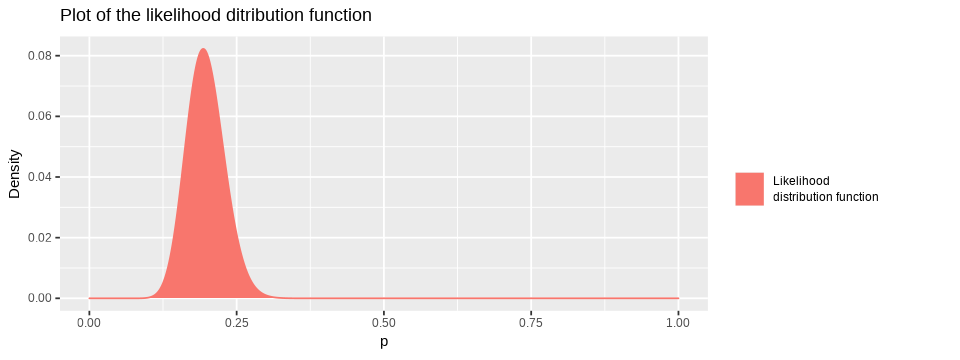

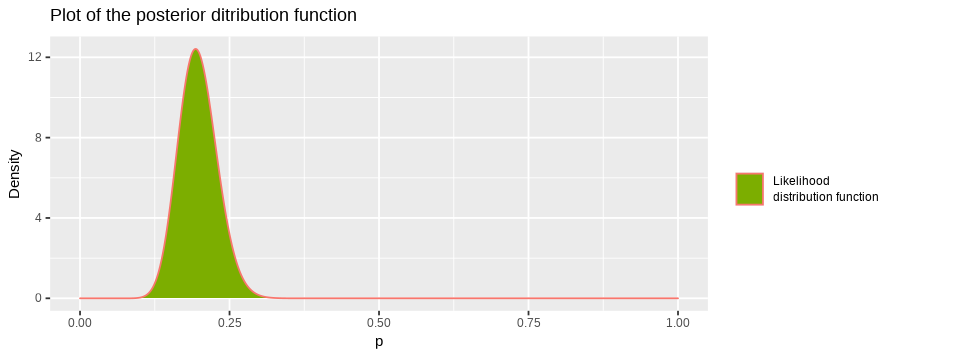

In [58]:
set_plot_dimensions(8, 3)
#colors <- c('Prior' = "#F8766D", 'Posterior' = "#7CAE00")

ggplot(df, aes(x = p, y = p.likelihood, col = "Likelihood \ndistribution function")) +
    geom_area(fill="#F8766D")  + 
    labs(title ="Plot of the likelihood ditribution function",
         x     = "p",
         y     = "Density",
         col   = "")

ggplot(df, aes(x = p, y = p.post, col = "Posterior.
\ndistribution function")) +
    geom_area(fill="#7CAE00")  + 
    labs(title ="Plot of the posterior ditribution function",
         x     = "p",
         y     = "Density",
         col   = "")

## Exercise 2

- Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.

- Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.

- Benny moved only recently to this new town and therefore he does non have the slightest idea about it. Therefore he decides to use a uniform prior.

- Chris believes that his prior should have a trapezoidal shape

$$ \begin{equation}
  f(X) =
    \begin{cases}
       20\,x   \hspace{2cm}  0\leq x \leq 0.1\\
       2       \hspace{2.55cm}  0.1\leq x \leq 0.3\\
       5-10\,x \hspace{1.3cm}  0.3\leq x \leq 0.5\\
       0       \hspace{2.5cm}  x \geq 0.1
    \end{cases}       
\end{equation} $$



###  Draw and compare the three prior distributions.

In [2]:
p <- seq(0,1,0.001)


In [9]:
#Data for Annas prior
alpha <- 4.8
beta  <- 19.2
anna.prior <- dbeta(p,alpha,beta)

#Data for Bennys prior
benny.prior <- dunif(p)

#Function for Chris
dchris <- function(x) {
              out <- ifelse(x<0.1,
                     20*x,
                     ifelse(x<0.3,
                     2,
                     ifelse(x<0.5,
                     5-10*x, 0)))
          return(out)} 

#Although the original pdf is not normalized I normalize it.
chris.prior <- dchris(p)/integrate(dchris,0,1)$value 

dprior <- data.frame(p, anna.prior, benny.prior, chris.prior)


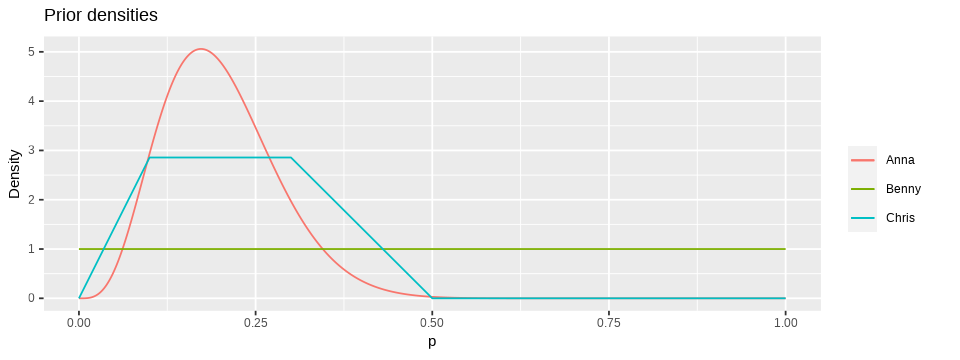

In [10]:
set_plot_dimensions(8, 3)
colors <- c('Anna' = "#F8766D", 'Benny' = "#7CAE00", 'Chris' = "#00BFC4")

ggplot(dprior, aes(x = p)) +
    geom_line (aes(y = anna.prior, color = 'Anna')) +
    geom_line (aes(y = benny.prior, color = 'Benny')) +
    geom_line (aes(y = chris.prior, color = 'Chris')) +
    labs(title ="Prior densities",
         x = "p",
         y = "Density",
         color = "") +
    scale_color_manual(values = colors)

- The next day the three students decide to interview a sample of 100 citizens of the small town, asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert hall.

### Evaluate and draw the three posterior distributions.


In [35]:
n <- 100
r <- 26
p <- seq(0,1,0.001)

#Again the likelihood is a binomial distribution
p.likelihood  <-  dbinom(x = r, size = n, prob = p)

dpost <- function (p,prior,r,n,...) {prior(p,...)*dbinom(x = r, size = n, prob = p)}

anna.post  <- dpost(p,dbeta,r,n,alpha,beta)/integrate(dpost,0,1,dbeta,r,n,alpha,beta)$value
benny.post <- dpost(p,dunif,r,n)           /integrate(dpost,0,1,dunif,r,n)$value
chris.post <- dpost(p,dchris,r,n)          /integrate(dpost,0,1,dchris,r,n)$value



dposterior <- data.frame(p, anna.post, benny.post, chris.post)

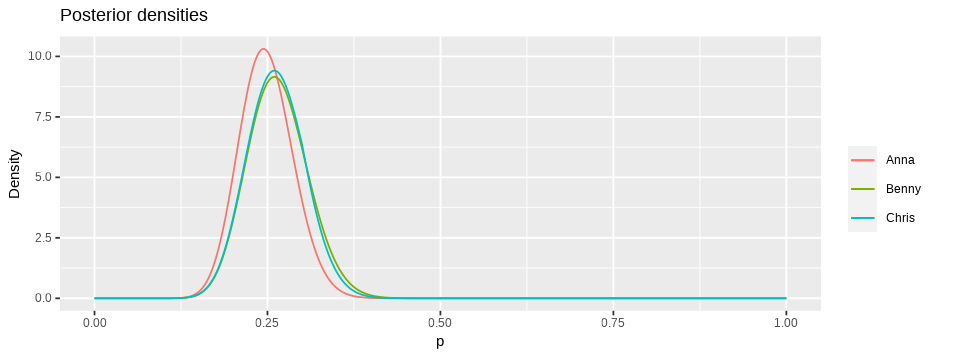

In [36]:
set_plot_dimensions(8, 3)
colors <- c('Anna' = "#F8766D", 'Benny' = "#7CAE00", 'Chris' = "#00BFC4")

ggplot(dposterior, aes(x = p)) +
    geom_line (aes(y = anna.post, color = 'Anna')) +
    geom_line (aes(y = benny.post, color = 'Benny')) +
    geom_line (aes(y = chris.post, color = 'Chris')) +
    labs(title ="Posterior densities",
         x = "p",
         y = "Density",
         color = "") + 
    scale_color_manual(values = colors)

### Give an estimate of the most probable value and the 95% credibility interval.


In [25]:
#install.packages("Bolstad2")
library(Bolstad2)


In [21]:
#Now we can estimate the media for the different distribution
a.post.media <- sintegral(p,p*anna.post)$int
b.post.media <- sintegral(p,p*benny.post)$int
c.post.media <- sintegral(p,p*chris.post)$int

In [68]:
#Now we can estimate the intervals of credibility, for this purpose the cdf function of the posterior might be useful

a.post.cdf <- sintegral(p,anna.post)
b.post.cdf <- sintegral(p,benny.post)
c.post.cdf <- sintegral(p,chris.post)

d<-abs(a.post.cdf$y-0.025)
a.min <- a.post.cdf$x[max((1:length(a.post.cdf$y))[d==min(d)])]

d<-abs(a.post.cdf$y-0.975)
a.max <- a.post.cdf$x[max((1:length(a.post.cdf$y))[d==min(d)])]

d<-abs(b.post.cdf$y-0.025)
b.min <- b.post.cdf$x[max((1:length(b.post.cdf$y))[d==min(d)])]

d<-abs(b.post.cdf$y-0.975)
b.max <- b.post.cdf$x[max((1:length(b.post.cdf$y))[d==min(d)])]

d<-abs(c.post.cdf$y-0.025)
c.min <- c.post.cdf$x[max((1:length(c.post.cdf$y))[d==min(d)])]

d<-abs(c.post.cdf$y-0.975)
c.max <- c.post.cdf$x[max((1:length(c.post.cdf$y))[d==min(d)])]

In [78]:
print(paste("The mean value of the posterior distribution of Anna is: ",sprintf("%.3f",a.post.media)))
print(paste("The 95% credibility interval for Anna  is: ","[",sprintf("%.3f",a.min),",",sprintf("%.3f",a.max),"]"))
print('')
print(paste("The mean value of the posterior distribution of Benny is: ",sprintf("%.3f",b.post.media)))
print(paste("The 95% credibility interval for Benny is: ","[",sprintf("%.3f",b.min),",",sprintf("%.3f",b.max),"]"))
print("")
print(paste("The mean value of the posterior distribution of Chris is: ",sprintf("%.3f",c.post.media)))
print(paste("The 95% credibility interval for Chris is: ","[",sprintf("%.3f",c.min),",",sprintf("%.3f",c.max),"]"))

[1] "The mean value of the posterior distribution of Anna is:  0.248"
[1] "The 95% credibility interval for Anna  is:  [ 0.176 , 0.327 ]"
[1] ""
[1] "The mean value of the posterior distribution of Benny is:  0.265"
[1] "The 95% credibility interval for Benny is:  [ 0.183 , 0.353 ]"
[1] ""
[1] "The mean value of the posterior distribution of Chris is:  0.262"
[1] "The 95% credibility interval for Chris is:  [ 0.183 , 0.345 ]"


In [72]:
#ADD PLOT WITH INTERVALS

## Exercise 3

-  A coin is flipped $n = 30$ times with the following outcomes:

    $\texttt{T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,
H, H
}$

### Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set

In [67]:
p <- seq(0,1,0.001)

#priors
alpha <- 10
beta  <- 10
beta.prior <- dbeta(p,alpha,beta)

flat.prior <- dunif(p)



n <- 30
r <- 15
p <- seq(0,1,0.001)

#Again the likelihood is a binomial distribution
likelihood  <-  dbinom(x = r, size = n, prob = p)

dpost <- function (p,prior,r,n,...) {prior(p,...)*dbinom(x = r, size = n, prob = p)}

beta.post  <- dpost(p,dbeta,r,n,alpha,beta)/integrate(dpost,0,1,dbeta,r,n,alpha,beta)$value
flat.post  <- dpost(p,dunif,r,n)           /integrate(dpost,0,1,dunif,r,n)$value




df <- data.frame(p, flat.prior, beta.prior,likelihood,flat.post,beta.post)

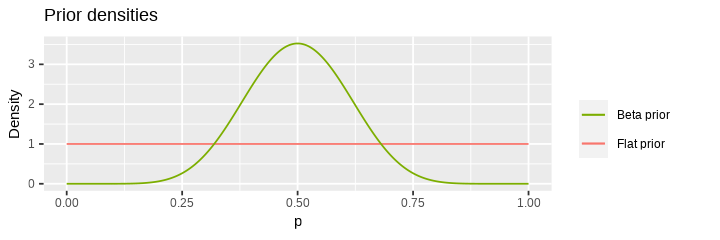

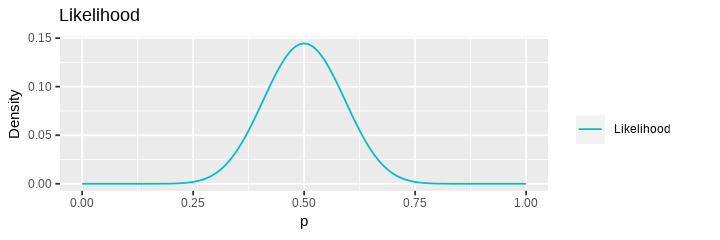

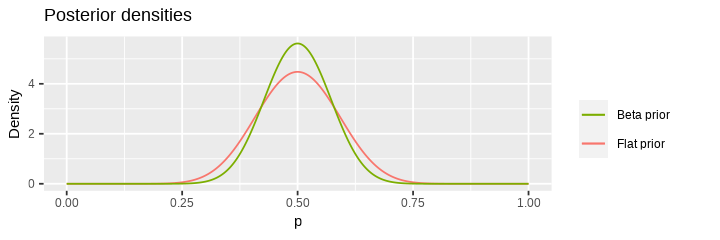

In [68]:
colors <- c('Flat prior' = "#F8766D", 'Beta prior' = "#7CAE00", 'Likelihood' = "#00BFC4")
set_plot_dimensions(6, 2)

ggplot(df, aes(x = p)) +
    geom_line (aes(y = flat.prior, color = 'Flat prior')) +
    geom_line (aes(y = beta.prior, color = 'Beta prior')) +
    labs(title ="Prior densities",
         x = "p",
         y = "Density",
         color = "") +
    scale_color_manual(values = colors)

ggplot(df, aes(x = p)) +
    geom_line (aes(y = likelihood, color = 'Likelihood')) +
    labs(title ="Likelihood",
         x = "p",
         y = "Density",
         color = "") +
    scale_color_manual(values = colors)

ggplot(df, aes(x = p)) +
    geom_line (aes(y = flat.post, color = 'Flat prior')) +
    geom_line (aes(y = beta.post, color = 'Beta prior')) +
    labs(title ="Posterior densities",
         x = "p",
         y = "Density",
         color = "") +
    scale_color_manual(values = colors)

### Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.


In [69]:
#Now we can estimate the media for the different distribution
flat.post.media <- sintegral(p,p*flat.post)$int
beta.post.media <- sintegral(p,p*beta.post)$int


In [70]:
#Now we can estimate the intervals of credibility, for this purpose the cdf function of the posterior might be useful

flat.post.cdf <- sintegral(p,flat.post)
beta.post.cdf <- sintegral(p,beta.post)

d<-abs(flat.post.cdf$y-0.025)
flat.min <- flat.post.cdf$x[max((1:length(flat.post.cdf$y))[d==min(d)])]

d<-abs(flat.post.cdf$y-0.975)
flat.max <- flat.post.cdf$x[max((1:length(flat.post.cdf$y))[d==min(d)])]

d<-abs(beta.post.cdf$y-0.025)
beta.min <- beta.post.cdf$x[max((1:length(beta.post.cdf$y))[d==min(d)])]

d<-abs(beta.post.cdf$y-0.975)
beta.max <- beta.post.cdf$x[max((1:length(beta.post.cdf$y))[d==min(d)])]


In [71]:
print(paste("The most probable value for the coin probability p using the flat prior is: ",sprintf("%.3f",flat.post.media)))
print(paste("The 95% credibility interval for this  is: ","[",sprintf("%.3f",flat.min),",",sprintf("%.3f",flat.max),"]"))
print('')
print(paste("The most probable value for the coin probability p using the beta prior is: ",sprintf("%.3f",beta.post.media)))
print(paste("The 95% credibility interval for this is: ","[",sprintf("%.3f",beta.min),",",sprintf("%.3f",beta.max),"]"))

[1] "The most probable value for the coin probability p using the flat prior is:  0.500"
[1] "The 95% credibility interval for this  is:  [ 0.330 , 0.669 ]"
[1] ""
[1] "The most probable value for the coin probability p using the beta prior is:  0.500"
[1] "The 95% credibility interval for this is:  [ 0.363 , 0.636 ]"


Warning message:
“Removed 500 row(s) containing missing values (geom_path).”Warning message:
“Removed 500 row(s) containing missing values (geom_path).”

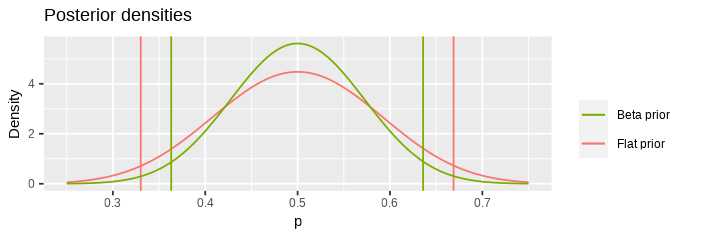

In [72]:
ggplot(df, aes(x = p)) +
    geom_line (aes(y = flat.post, color = 'Flat prior')) +
    geom_vline(xintercept = flat.min,color="#F8766D")+
    geom_vline(xintercept = flat.max,color="#F8766D")+
    geom_line (aes(y = beta.post, color = 'Beta prior')) +
    geom_vline(xintercept = beta.min,color="#7CAE00")+
    geom_vline(xintercept = beta.max,color="#7CAE00")+
    xlim(c(0.25,0.75))+

    labs(title ="Posterior densities",
         x = "p",
         y = "Density",
         color = "") +
    scale_color_manual(values = colors)

### Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).


###  Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?
